Probability Distribuitons
=========================

This notebook introduces some of the probability distribution functions in Python. It relies mostly on the [scipy][scipy] module. This module was written specifically for scientific computation. 

Specifically we will look closely to the *scipy.stats* module and explore its pre-defined distribution functions. 

[scipy]: http://scipy.org 

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

## Uniform Distribution

This distribution assumes all outcomes have equal probability. It can be discrete or continuous. For discrete random variable, such as tossing a coin, the probably mass function is  

$$ P(H) = P(T) = 0.5$$


([<matplotlib.axis.XTick at 0x117bf9990>,
 <a list of 2 Text xticklabel objects>)

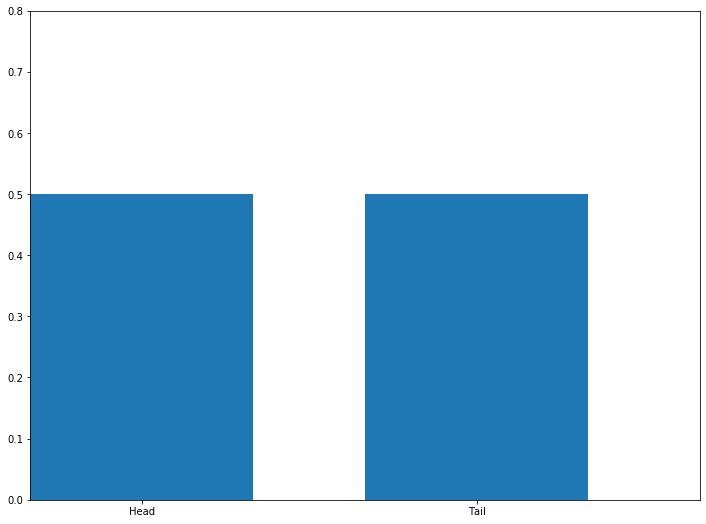

In [20]:
plt.xlim(-0.5,2.5) #setting the limit on the horizontal axis
plt.ylim(0,0.8) #setting limit on the veritcal axis
plt.bar([0,1.5], height=[0.5,0.5], width=1) #plot the uniform distribution for head and tail. 
plt.xticks([0,1.5],['Head', 'Tail']) #draw the label of each outcome

## Binomial Distribution

The binomial distribution depends on two paramters, the total number of cases and the probability for each individual case to occur. It is an extension to the Bernoulli Distribution. 
$$ f(k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k} $$.

<BarContainer object of 11 artists>

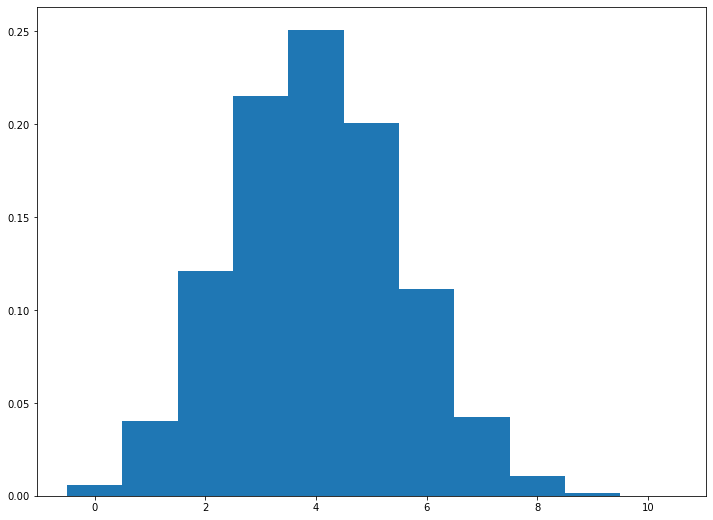

In [16]:
n = 10
prob = 0.4
#using list comprehension to generate all cases in the distribution.
bin_dist = sps.binom.pmf(range(0,n+1),n=n, p=prob) 
plt.bar(range(0,n+1), height=bin_dist, width=1)

## Exercise
1. Change the value of $n$ above and re-run the code in the block. How does the shape of the histogram change? 
2. What can you say about the chance of pass a multiple choice test if you were to guess the answer of every question? 

Normal Distribution
-------------------
This is easily one of the most important distributions. 
$$f(x) = \frac{1}{\sqrt{2\pi}} \exp \left ( -\frac{ (x-\mu)^2}{2\sigma^2} \right )$$

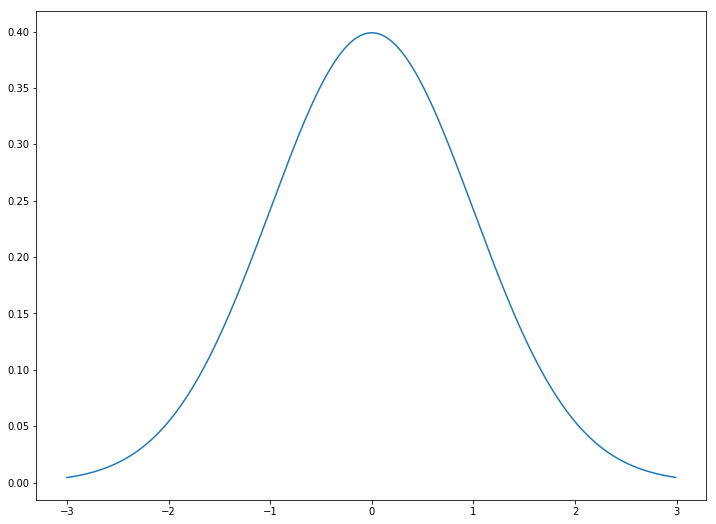

In [5]:
x = np.arange(-3,3,0.01) #specify the range of possible outcomes
y = sps.norm.pdf(x) #draw the pdf of a normal distribution. 
plt.plot(x,y) #plot the pdf

The normal distribution depends on two parameters $\mu$ and $\sigma$. This can be adjusted in the code. 

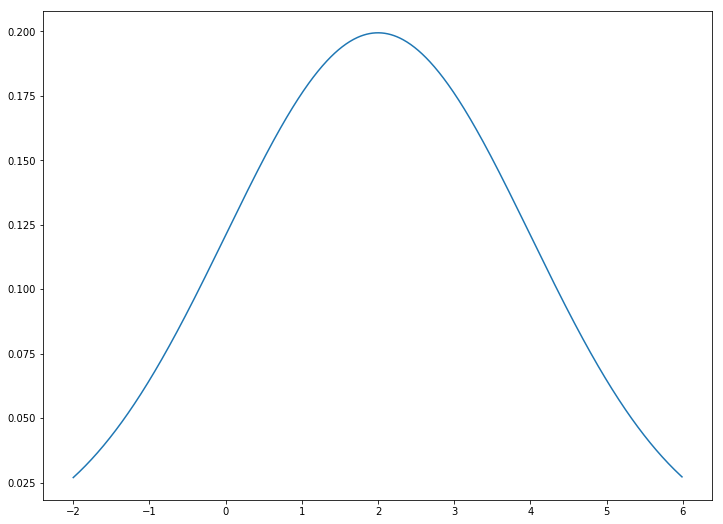

In [6]:
mu = 2 #set the value of mu
sigma = 2 #set of value of sigma
x1 = np.arange(mu-4,mu+4,0.01)
y1 = sps.norm.pdf(x1,loc=mu, scale=sigma) #loc is $\mu$ and scale is $\sigma$. 
plt.plot(x1,y1)

Exercise
========
What do the parameters $\mu$ and $\sigma$ do? Hint: Re-run the code in the last block with different values of $\mu$ (*loc*) and $\sigma$ (*scale*). 
You may need to adjust *x1* or define it differently for different values of $\mu$ and $\sigma$. 

We can create a sample of normally distributed random variables by using the random number generator

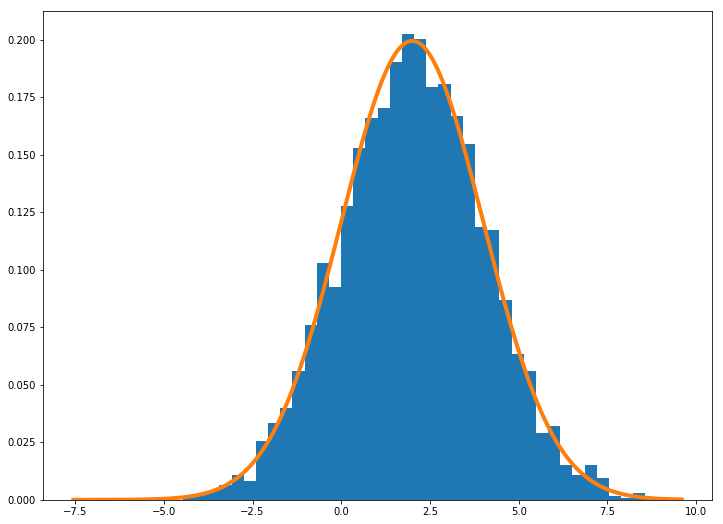

In [7]:
N = 4000 #Set sample size 
ysample = sps.norm.rvs(size=N, loc=mu, scale=sigma) #randomly generate random number following a normal distribution. 
x2 = np.arange(min(ysample), max(ysample), 0.01) #construct the range of possible outcomes from the data. 
ytheory = sps.norm.pdf(x2,loc=mu,scale=sigma) #draw the theoretical pdf
plt.hist(ysample,normed=True,bins=50)
plt.plot(x2,ytheory,linewidth=4)

$\chi^2$ Distribution
---------------------
The $\chi^2$ distribution with $k$ degrees of freedom can be derived by considering 
$$y = \sum^k_{i=1} x_i^2$$
where each $x_i$ follows an *independently and identically* distributed standard normal random variable. 

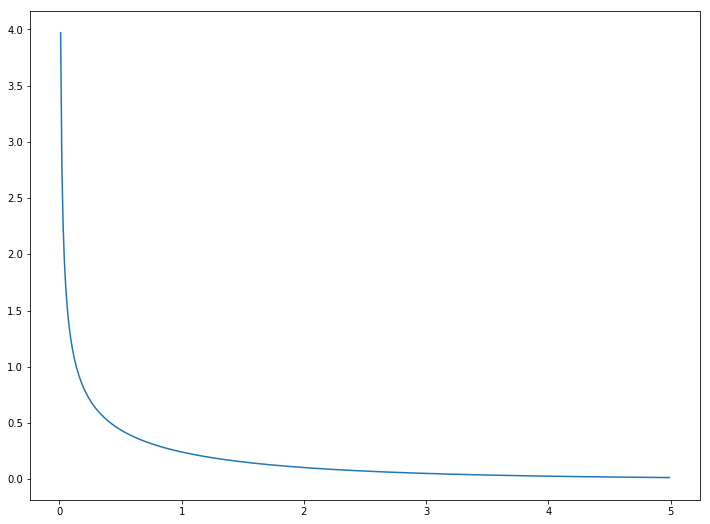

In [8]:
x = np.arange(0,5,0.01) #Generate the range of possible outcomes. 
y = sps.chi2.pdf(x,df=1) # Values of the probability density function at each x. 
plt.plot(x,y) #plot the density function. 

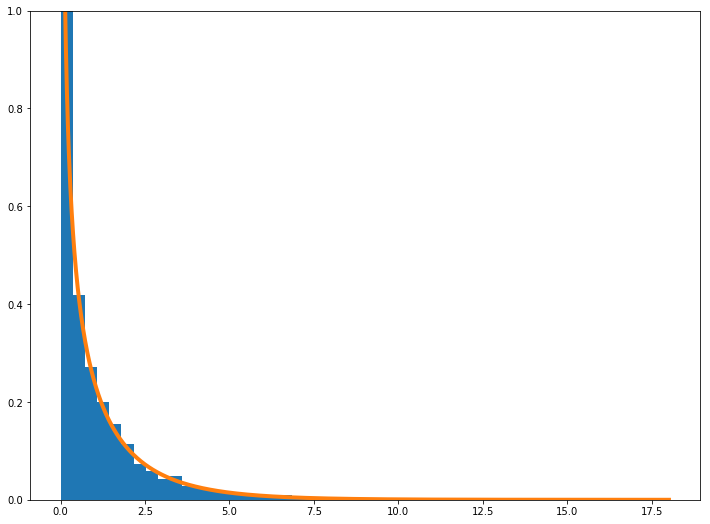

In [9]:
ysub = sps.norm.rvs(size=N) #randomly generate the outcome of a standard normal variate 
ysub = np.power(ysub,2) #square the sequence of random number. 
miny = min(ysub) #Construct the upper and lower bounds for plotting. 
maxy = max(ysub)
xrange = np.arange(miny,maxy,0.01)
y = sps.chi2.pdf(xrange,df=1) #Generate values of the pdf for chi-squared with 1 degree of freedom
plt.ylim(0,1)
plt.hist(ysub,normed=True, bins=50) #plot the histogram for the squared random variable.
plt.plot(xrange,y,linewidth=4) #plot the pdf of the chi-squared distribution with 1 degree of freedom. 

The green line above is the pdf of a $\chi^2$ with 1 degree of freedom. The histogram came from the data drawn from squaring a normal distribution. 

$\chi^2$ with different degrees of freedom
------------------------------------------
Theoretically, if we add the squared of *dof* independently distribution standard normal random variates, then the resulting random variable follows a $\chi^2$ distribution with *dof* degrees of freedom. 
We can examine this by using the code below.

In [10]:
dof=10 #Set the degrees of freedom
ysub2 = sps.norm.rvs(size=(N,dof)) #generate dof NID random variables with N observations.
ysub2 = np.power(ysub2,2) #Squaring the observations. 
ysub2total = np.sum(ysub2,axis=1) #summing over each columns. 

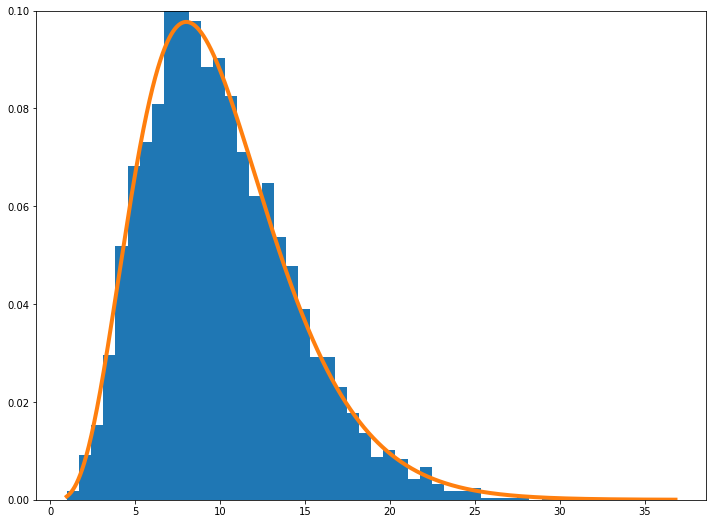

In [11]:
miny = min(ysub2total)
maxy = max(ysub2total)
xrange = np.arange(miny,maxy,0.01)
y = sps.chi2.pdf(xrange,df=dof)
plt.ylim(0,dof/100)
plt.hist(ysub2total,normed=True,bins=50)
plt.plot(xrange,y,linewidth=4)

Exercise
========
1. Change the value of the dof variable and re-run the last two blocks. Convince yourself that the number of normal random variables in the sum governs the degree of freedom in the resulting $\chi^2$ distribution.  
2. What will happen if we add a set of non-standard normal random variables? That is, what is the distribution of a sum of squared normally independently distributed variables where the normal distributions have non-zero mean and non-unit variance? 
Hint: Use the codes from the last two blocks as the base for exploring the second part. 

F-Distribution
--------------
Let $x_1$ and $x_2$ be two random variables following $\chi^2$ distributions with $k_1$ and $k_2$ degree, respectively, then the ratio
$$y=\frac{x_1}{x_2}$$
is said to follow a F-distribution with $(k_1,k_2)$ degrees of freedom. 
To illustrate this, note that the variable *ysub* follows a $\chi^2$ variable with 1 degree to freedom where as *ysub2total* follow $\chi^2$ with *dof* degree of freedom. So the ratio *ysub/ysub2total* should follow a F distribution with $(1,dof)$ degree of freedom. 

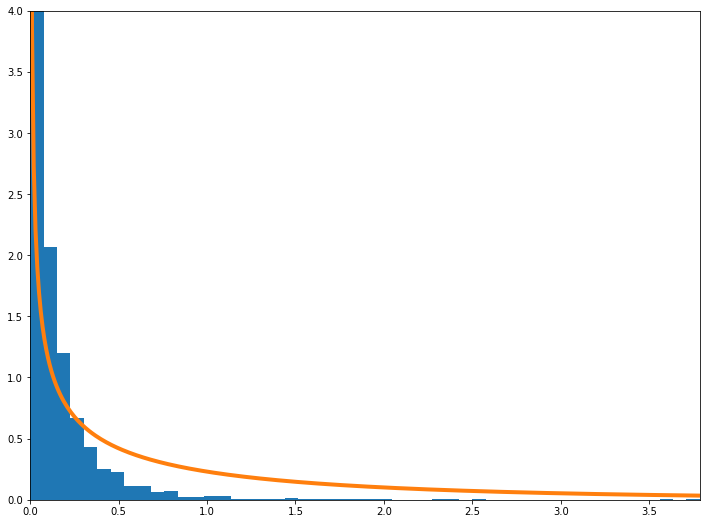

In [12]:
f = ysub/ysub2total #Create the ratio
x = np.arange(min(f), max(f), 0.01) #get the range of possible outcomes from the simulated data. 
y = sps.f.pdf(x, dfn=1, dfd=dof) #draw the pdf of a F distribution with 1 and dof degrees of freedom. 
plt.xlim(min(f), max(f))
plt.ylim(0,4)
plt.hist(f,normed=True,bins=50)
plt.plot(x,y,linewidth=4)

Exercise
========
Generate $\chi^2$ with different degrees of freedom and examine their ratios. Compare the histogram of these ratios and their implied F-distribution. Hint: Modify the code from the last block. 

t-distribution
--------------
Let $x$ be a standard normal random variable and $y$ be a random variable following $\chi^2(k)$, then the ratio
$$t = \frac{x}{\sqrt{y/k}}$$
is said to follow a $t$-distribution with $k$ degrees of freedom. 

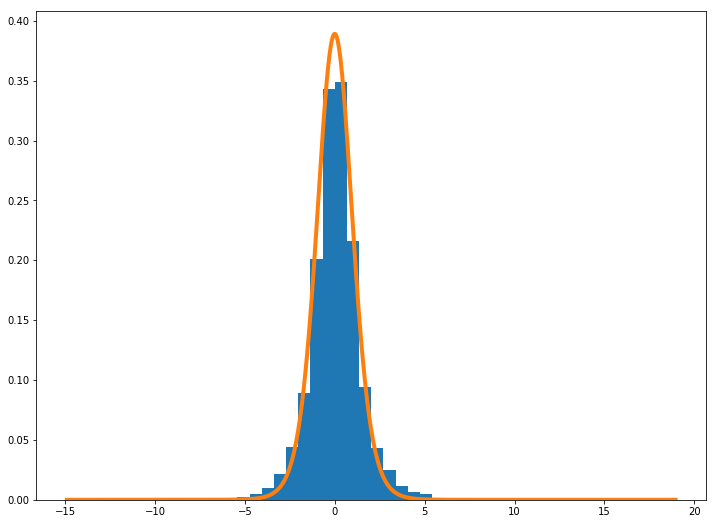

In [13]:
x = sps.norm.rvs(size=N)
t = x/(ysub2total/dof) #recall ysub2total follows a chi-squared distribution. 
xrange = np.arange(min(t),max(t),0.01)
ttheory = sps.t.pdf(xrange,df=dof)
plt.hist(t,normed=True,bins=50)
plt.plot(xrange,ttheory,linewidth=4)

Exercise
========
What is the main different between the t-distribution and the normal distribution. Specifically,
1. What happens to the t-distribution as *dof* becomes large? 
2. For a low *dof* (ie less than 15), how do the tails of the t-distributions compare to the normal distribution? In other words, what is the likelihood of observing extreme values from a t-distribition compare that to a normal random variate? 